In [42]:
import pandas as pd

df = pd.read_csv('train.csv')

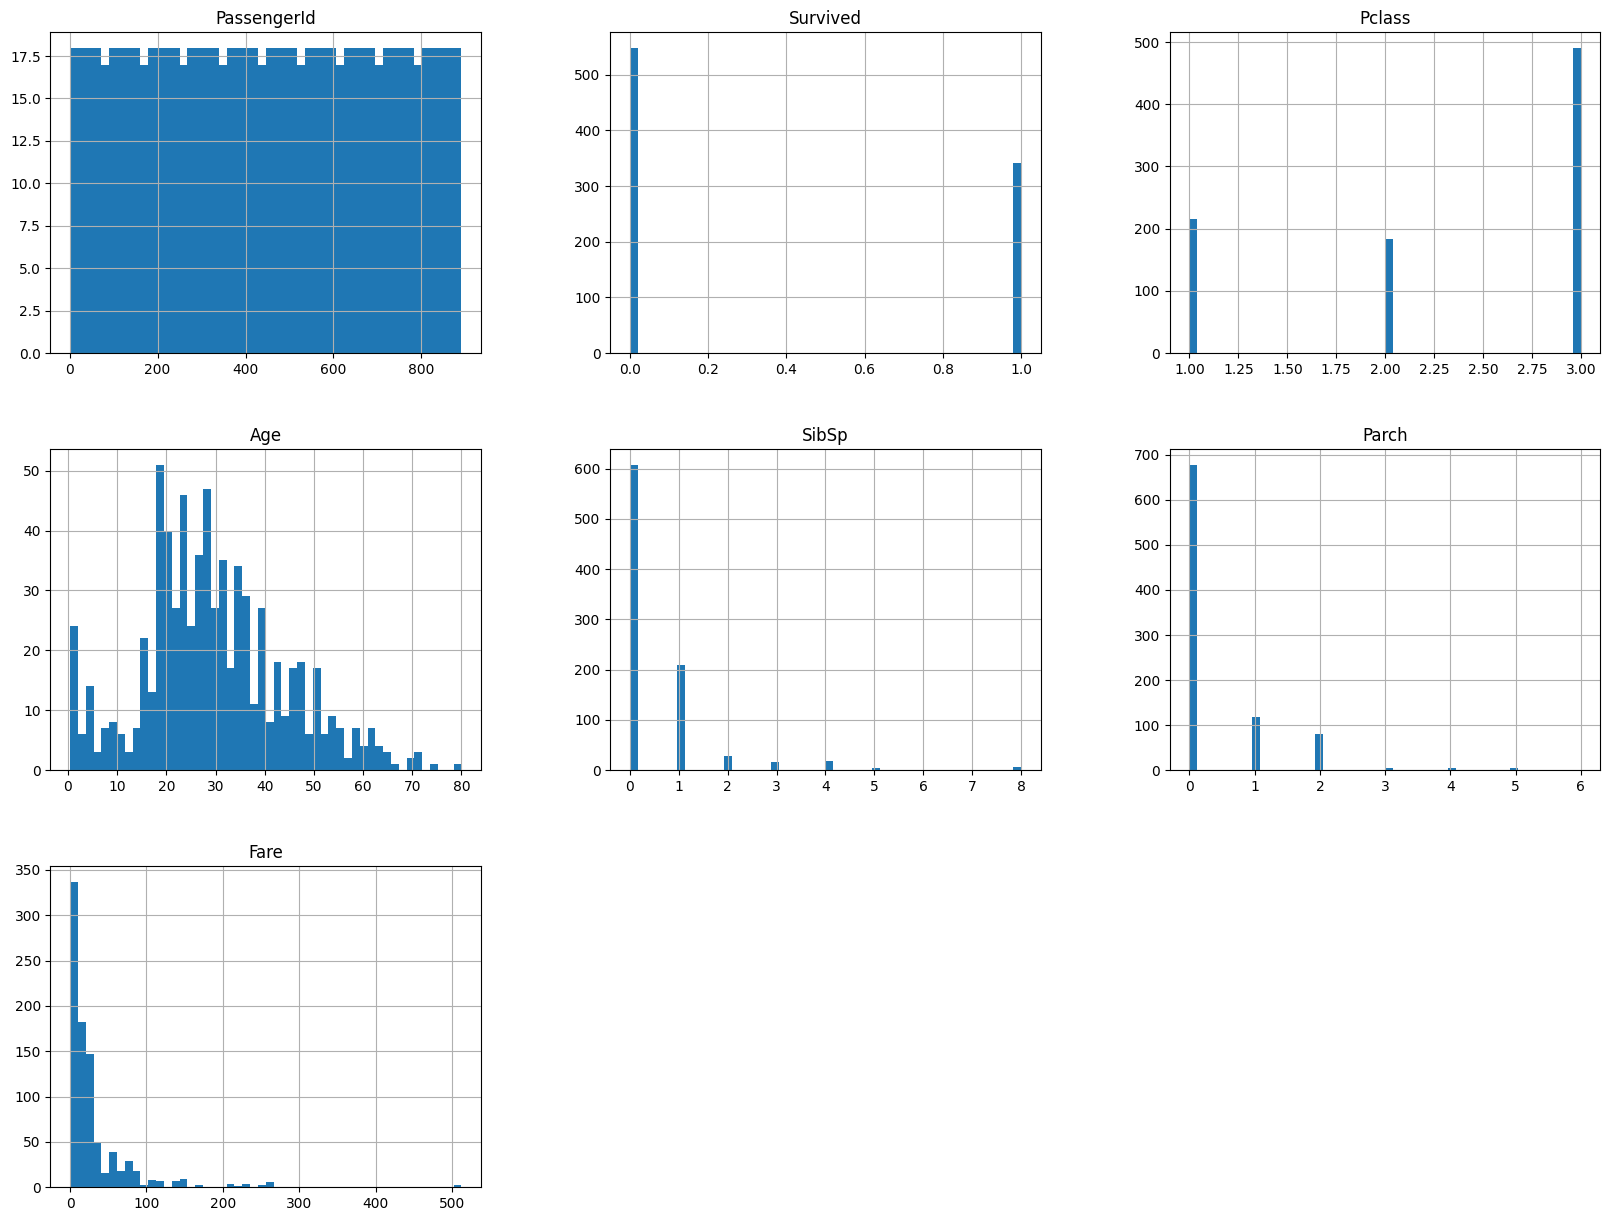

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [44]:
df.loc[df['Sex'] == 'male', 'Sex'] = 1
df.loc[df['Sex'] == 'female', 'Sex'] = 0

In [52]:
df['Sex'] = df['Sex'].astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [53]:
corr_matrix = df.corr(numeric_only=True)

In [54]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

array([[<AxesSubplot: xlabel='Sex', ylabel='Sex'>,
        <AxesSubplot: xlabel='Age', ylabel='Sex'>,
        <AxesSubplot: xlabel='Survived', ylabel='Sex'>],
       [<AxesSubplot: xlabel='Sex', ylabel='Age'>,
        <AxesSubplot: xlabel='Age', ylabel='Age'>,
        <AxesSubplot: xlabel='Survived', ylabel='Age'>],
       [<AxesSubplot: xlabel='Sex', ylabel='Survived'>,
        <AxesSubplot: xlabel='Age', ylabel='Survived'>,
        <AxesSubplot: xlabel='Survived', ylabel='Survived'>]],
      dtype=object)

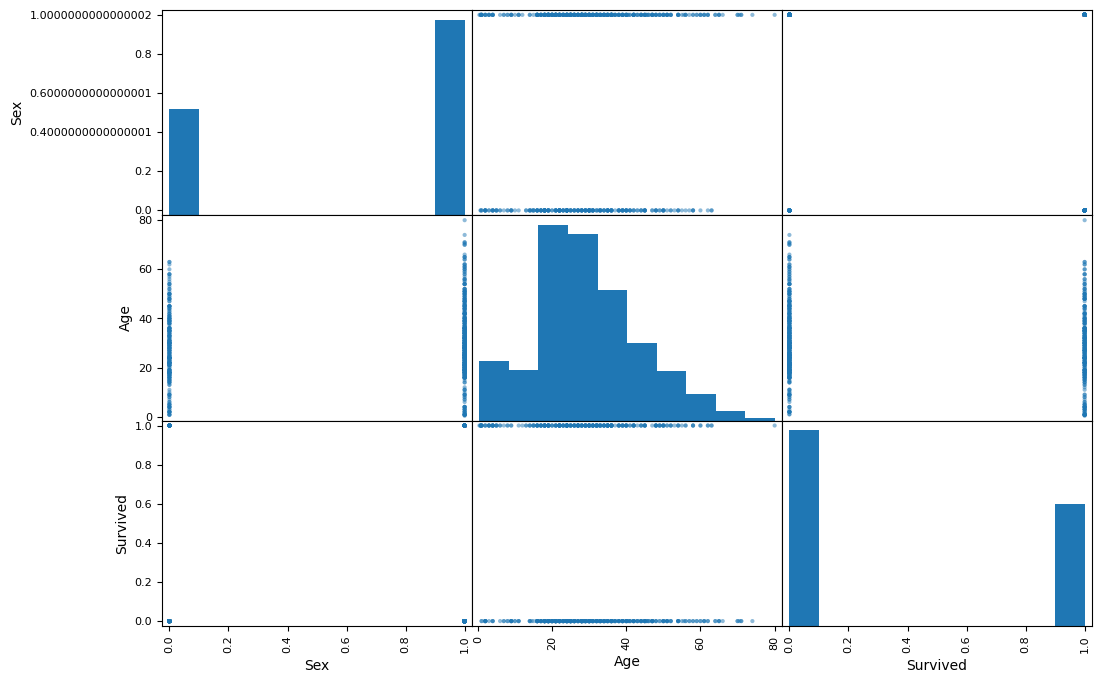

In [55]:
from pandas.plotting import scatter_matrix

attributes = ['Sex', 'Age', 'Survived']
scatter_matrix(df[attributes], figsize=(12,8))

In [186]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

cat_attrs = ['Cabin', 'Ticket', 'Embarked', 'Name']
df_num = df.drop(cat_attrs, axis=1)
df_num = df_num.drop('Survived', axis=1)
df_num = df_num.drop('Cabin', axis=1)
df_cat = df[cat_attrs]

KeyError: "['Cabin'] not found in axis"

In [187]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import numpy as np

features = df.drop('Survived', axis=1)
labels = df['Survived']

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(missing_values=np.NaN, strategy="most_frequent")),
    ("encoder", OneHotEncoder())
])

pipeline = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), df_num.columns),
    ("cat", OneHotEncoder(), df_cat.columns)
])

features_prepared = pipeline.fit_transform(features)

In [188]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Cabin     204 non-null    object
 1   Ticket    891 non-null    object
 2   Embarked  889 non-null    object
 3   Name      891 non-null    object
dtypes: object(4)
memory usage: 28.0+ KB


In [189]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(features_prepared, labels)

RandomForestClassifier(random_state=42)

In [190]:
some_data = features.iloc[:5]
some_labels = labels.iloc[:5]
some_data = pipeline.transform(some_data)
print("Predictions: ", model.predict(some_data))
print("Labels: ", some_labels)

Predictions:  [0 1 1 1 0]
Labels:  0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [191]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model, features_prepared, labels, cv=3)

In [192]:
from sklearn.metrics import confusion_matrix
confusion_matrix(labels,pred)

array([[518,  31],
       [133, 209]])

In [193]:
from sklearn.metrics import precision_score, recall_score

p = precision_score(labels, pred)
r = recall_score(labels, pred)

(p,r)

(0.8708333333333333, 0.6111111111111112)